In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)
repeat_experiments = 10  # Number of runs to compute average time

# Function to create synthetic data
def create_synthetic_data(num_samples, num_features, case):
    if case == 1:
        data = pd.DataFrame(np.random.randn(num_samples, num_features))
        labels = pd.Series(np.random.randn(num_samples))
    elif case == 2:
        data = pd.DataFrame(np.random.randn(num_samples, num_features))
        labels = pd.Series(np.random.randint(num_features, size=num_samples), dtype="category")
    elif case == 3:
        data = pd.DataFrame({i: pd.Series(np.random.randint(num_features, size=num_samples), dtype="category") for i in range(num_features)})
        labels = pd.Series(np.random.randint(num_features, size=num_samples), dtype="category")
    elif case == 4:
        data = pd.DataFrame({i: pd.Series(np.random.randint(num_features, size=num_samples), dtype="category") for i in range(num_features)})
        labels = pd.Series(np.random.randn(num_samples))
    else:
        raise ValueError("Invalid case number")

    return data, labels

# Function to record training time
def record_training_time(train_data, train_labels, case_type):
    start = time.time()
    if case_type in [1, 4]:
        eval_criteria = "MSE"
    else:
        eval_criteria = "gini_index"
    
    model = DecisionTree(criterion=eval_criteria)
    model.fit(train_data, train_labels)
    
    time_taken = time.time() - start
    return time_taken, model

# Function to record prediction time
def record_prediction_time(trained_model, test_data):
    start = time.time()
    pred_labels = trained_model.predict(test_data)
    
    time_taken = time.time() - start
    return time_taken


sample_sizes = [20, 60, 100]
feature_counts = [2, 5, 10]
cases = [1, 2, 3, 4]
training_times = []
prediction_times = []

for case in cases:
    case_train_times = []
    case_pred_times = []
    
    for sample_size in sample_sizes:
        train_times_per_sample = []
        pred_times_per_sample = []
        
        for feature_count in feature_counts:
            data, labels = create_synthetic_data(sample_size, feature_count, case)
            
            train_data, test_data = data[:int(0.7*sample_size)], data[int(0.7*sample_size):]
            train_labels, test_labels = labels[:int(0.7*sample_size)], labels[int(0.7*sample_size):]
            
            train_time, model = record_training_time(train_data, train_labels, case)
            train_times_per_sample.append(train_time)
            
            pred_time = record_prediction_time(model, test_data)
            pred_times_per_sample.append(pred_time)
        
        case_train_times.append(train_times_per_sample)
        case_pred_times.append(pred_times_per_sample)
    
    training_times.append(case_train_times)
    prediction_times.append(case_pred_times)



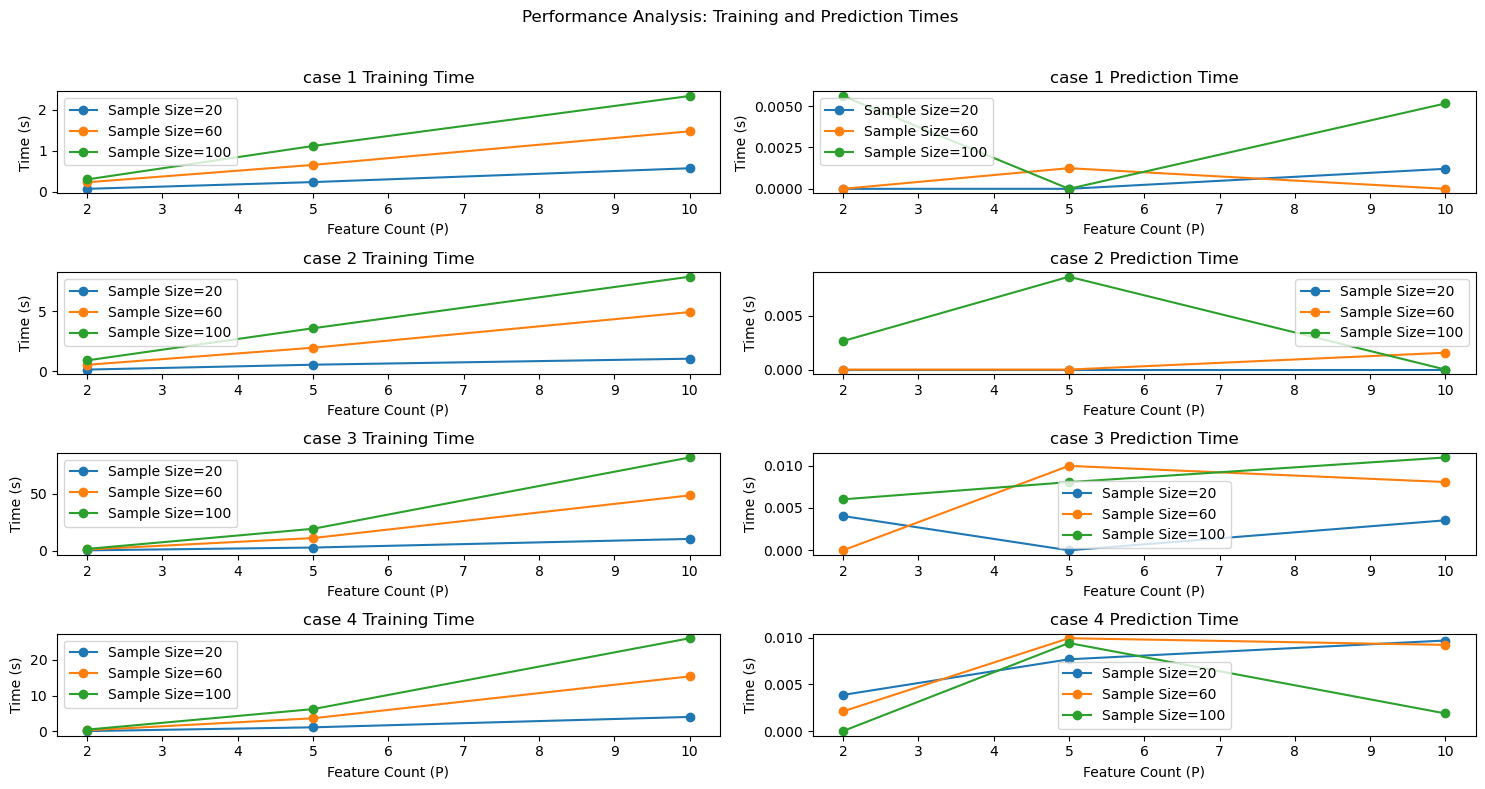

In [9]:
fig, axes = plt.subplots(nrows=len(cases), ncols=2, figsize=(15, 8))
fig.suptitle('Performance Analysis: Training and Prediction Times')

for idx, case in enumerate(cases):
    axes[idx, 0].set_title(f"case {case} Training Time")
    for idx_sample, sample_size in enumerate(sample_sizes):
        axes[idx, 0].plot(feature_counts, training_times[idx][idx_sample], marker='o', label=f'Sample Size={sample_size}')
    axes[idx, 0].set_xlabel('Feature Count (P)')
    axes[idx, 0].set_ylabel('Time (s)')
    axes[idx, 0].legend()

    axes[idx, 1].set_title(f"case {case} Prediction Time")
    for idx_sample, sample_size in enumerate(sample_sizes):
        axes[idx, 1].plot(feature_counts, prediction_times[idx][idx_sample], marker='o', label=f'Sample Size={sample_size}')
    axes[idx, 1].set_xlabel('Feature Count (P)')
    axes[idx, 1].set_ylabel('Time (s)')
    axes[idx, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
